<a href="https://colab.research.google.com/github/IshitaLohia/Spotify_Song_Recommendation/blob/main/SpotifyData_EDA_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense



In [16]:
# Load dataset (Replace with your actual dataset)
df = pd.read_csv("/content/sample_data/dataset.csv")
df.sample(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
57489,57489,4yv0B8k4L6QCOlxojOgH9c,Cafuné,New Pop Classics,Tek It,0,191823,False,0.423,0.913,...,-5.354,1,0.0655,0.000065,0.000000,0.269,0.59600,146.995,4,indie
60183,60183,0OgtJSBtTb9szRJ6yb8ASD,Intence,Through The Gate,Through The Gate,27,168176,True,0.634,0.471,...,-8.861,1,0.5000,0.224000,0.000000,0.107,0.26500,113.002,4,j-dance
51487,51487,5zjFsuLrTM5sp6coribhCa,Sukhwinder Singh,Taal (Original Motion Picture Soundtrack),Taal Se Taal - Western Version,62,154200,False,0.771,0.720,...,-11.742,1,0.0867,0.203000,0.001100,0.335,0.49200,94.968,4,hip-hop
101996,101996,3OwZ8e7lb5Assv14ZRW1rU,Rain Sounds,Soft Rain Sleep,Forrest Rain,32,102649,False,0.468,0.993,...,-24.274,0,0.0386,0.250000,0.945000,0.932,0.00964,49.296,4,sleep
74593,74593,56QI0cHMqOQRBw4jbNFGZD,Chico César;Lazzo Matumbi;Seu Pereira;Luizinho...,Estado de Poesia (Ao Vivo) (Deluxe Edition),Mama África / Brilho de Beleza / Pra Não Dizer...,42,570563,False,0.515,0.729,...,-10.917,1,0.1000,0.063900,0.000003,0.956,0.74200,82.394,4,mpb


In [17]:
#How many rows and columns?
ncols, nrows = df.shape
print(f'Dataset has {ncols} rows and {nrows} columns')

Dataset has 114000 rows and 21 columns


In [18]:
#Are there duplicated rows?

duplicated_rows = df.duplicated().sum()

if duplicated_rows == 0:
    print('There are 0 rows that are duplicated, which means each row in the DataFrame is unique.')
    print('So that we do not need to continue processing duplicate lines')
else:
    print(f'There are {duplicated_rows} rows that are duplicated so we need to drop those {duplicated_rows} rows')
    df = df.drop_duplicates()
    print(f'After drop duplicated rows, there are {df.shape[0]} rows left')

There are 0 rows that are duplicated, which means each row in the DataFrame is unique.
So that we do not need to continue processing duplicate lines


In [19]:
#data type of each column

df.dtypes

,0
Unnamed: 0,int64
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64


In [20]:
#Missing values in each row

# Missing values in each row
missing_values_per_row = df.isnull().sum(axis=1)
count_per_missing_value = missing_values_per_row.value_counts().sort_index()

# Print the results
for missing, rows in count_per_missing_value.items():
    print(f'{rows} row(s) have {missing} missing values')

total_rows_with_missing_values = (df.isnull().any(axis=1)).sum()
print(f'Total number of rows with missing values: {total_rows_with_missing_values}')

113999 row(s) have 0 missing values
1 row(s) have 3 missing values
Total number of rows with missing values: 1


In [21]:
numerical_cols = df[df.columns[(df.dtypes == 'float64') | (df.dtypes == 'int64')]]
numerical_cols.shape

(114000, 15)

In [22]:
numerical_cols.sample(5)

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
98647,98647,23,86973,0.423,0.0384,6,-19.436,1,0.0632,0.878,0.000011,0.0786,0.133,91.526,3
61874,61874,19,258160,0.293,0.4840,7,-7.425,1,0.0338,0.729,0.000001,0.1220,0.151,77.003,4
33842,33842,35,155474,0.775,0.8620,2,-5.341,1,0.1370,0.224,0.000000,0.3340,0.454,99.999,4
4729,4729,42,203653,0.355,0.0552,7,-25.603,0,0.0334,0.976,0.915000,0.1310,0.195,106.809,4
106081,106081,0,177634,0.575,0.7500,3,-6.636,1,0.0589,0.294,0.000000,0.1380,0.298,99.860,4


In [23]:
#Percentage of missing values
numerical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   popularity        114000 non-null  int64  
 2   duration_ms       114000 non-null  int64  
 3   danceability      114000 non-null  float64
 4   energy            114000 non-null  float64
 5   key               114000 non-null  int64  
 6   loudness          114000 non-null  float64
 7   mode              114000 non-null  int64  
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  time_signature    114000 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 13.0 MB


In [24]:
dist_numerical_cols = numerical_cols.describe().T[['min', 'max']]
dist_numerical_cols['Missing Values'] = numerical_cols.isnull().sum()
dist_numerical_cols['Missing Percentage'] = (numerical_cols.isnull().mean() * 100).round(2)
# The number of -1 values in the 'key' column
dist_numerical_cols.loc['key', 'Missing Values'] = (df['key'] == -1).sum()
dist_numerical_cols

,min,max,Missing Values,Missing Percentage
Unnamed: 0,0.000,113999.000,0,0.0
popularity,0.000,100.000,0,0.0
duration_ms,0.000,5237295.000,0,0.0
danceability,0.000,0.985,0,0.0
energy,0.000,1.000,0,0.0
key,0.000,11.000,0,0.0
loudness,-49.531,4.532,0,0.0
mode,0.000,1.000,0,0.0
speechiness,0.000,0.965,0,0.0
acousticness,0.000,0.996,0,0.0


In [25]:
#Numerical Columns
numerical_cols.describe()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


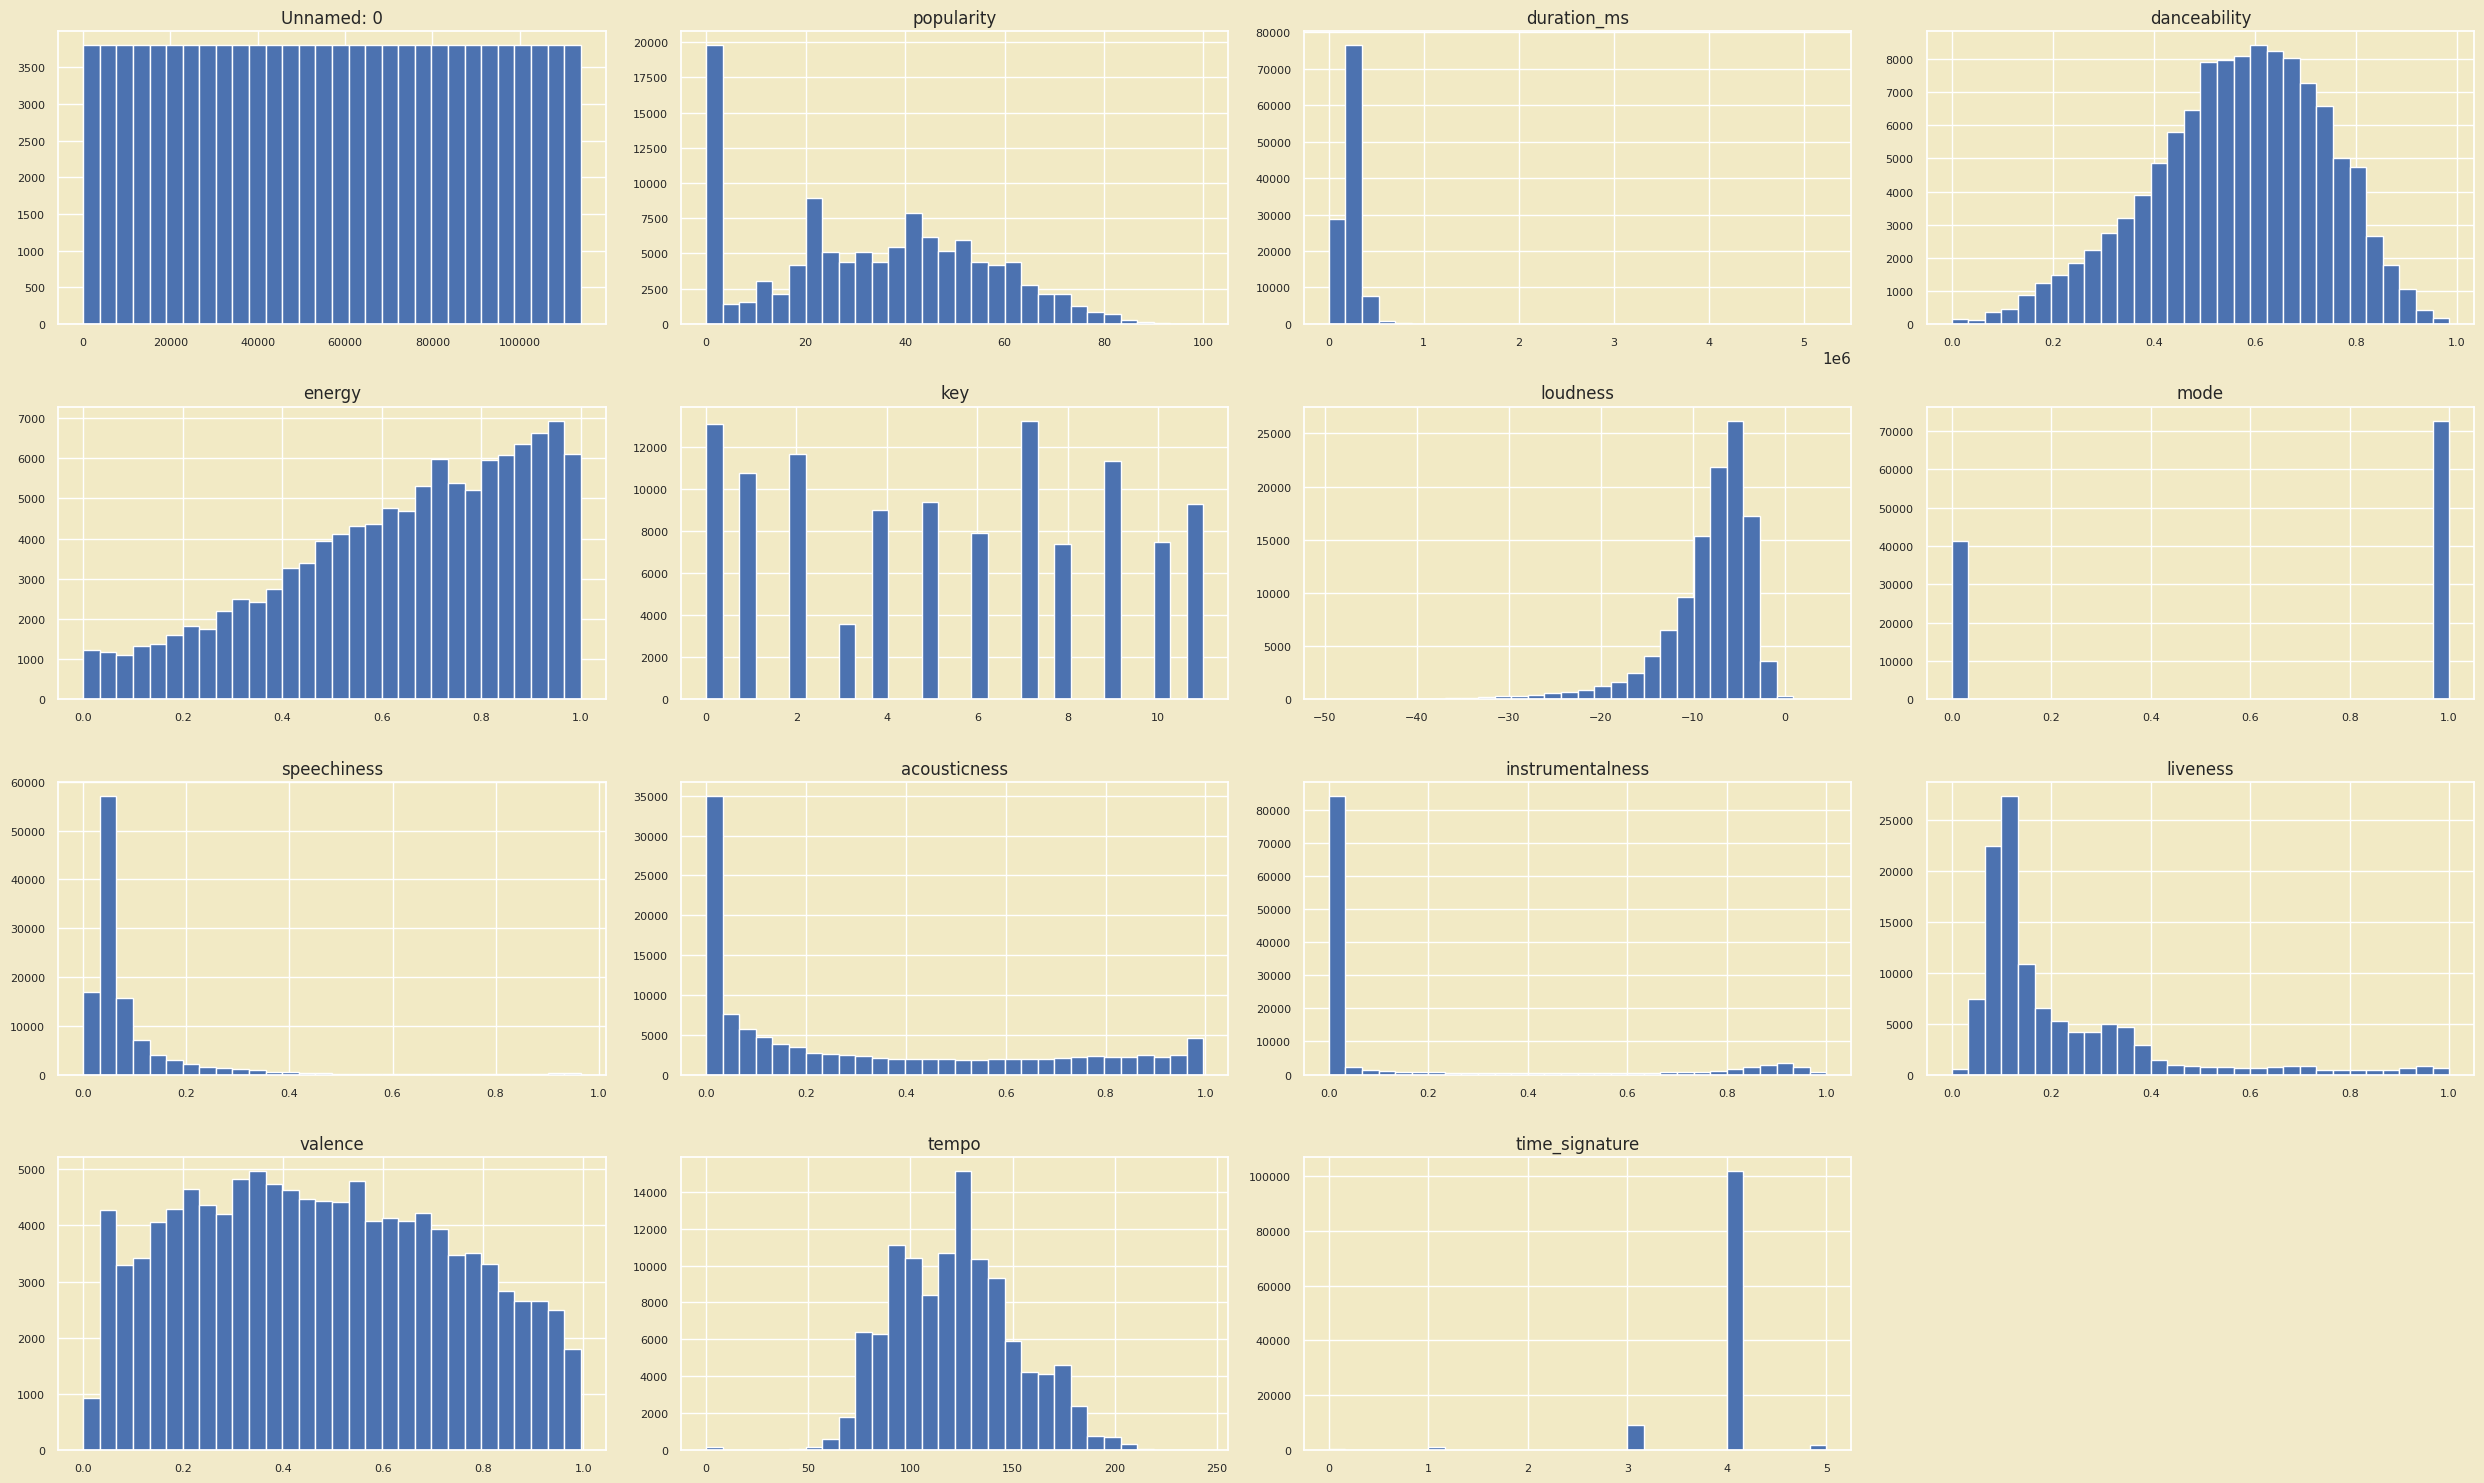

In [26]:

#Distribution of numerical columns

# Set an attractive style for the plot
sns.set_style("darkgrid")
#sns.set_palette("pastel")
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC9"})
numerical_cols.hist(figsize=(25,15), bins=30, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

 Comment

The columns danceability, tempo, valence have distributions close to normal.
The column loudness has a left-skewed distribution, mainly songs with noise levels ranging from -15 to -5 dB.
The columns speechiness, acousticness, instrumentalness, and liveness have right-skewed distributions, mostly songs with low values.
There are many songs with a popularity value of 0; the rest are close to a normal distribution.
The duration_ms column has a right-skewed distribution, with most songs having a duration of less than 500,000 ms (8 minutes) and the longest around 5 million ms (83 minutes).
The energy column has an increasing distribution from 0 to 1, mainly songs with values from 0.4 to 0.9.
The key column has distinct values from 0 to 11, distributed fairly evenly.
The mode column has 2 values, 0 and 1, with the value 1 dominating, almost double the value 0.
The time_signature column has many songs with a value of 5 (majority).
The columns danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence all have min = 0 and max = 1.

In [27]:
categorical_cols = df[df.columns[(df.dtypes == 'object') | (df.dtypes == 'bool')]]
categorical_cols.shape

(114000, 6)

In [28]:
categorical_cols.sample(5)

,track_id,artists,album_name,track_name,explicit,track_genre
16258,5FWH3Ng6Xwhsu5LIYRL4o4,Robert Schumann;Isata Kanneh-Mason,Relajación y siestas,"Liederkreis, Op. 39: 5. Mondnacht (Arr. Clara ...",False,classical
56403,5naar7XewEOAjOywIp6Jjq,Wallows,Nothing Happens,Remember When,False,indie-pop
42884,1aOztM7kwPxE6qH80ahcRo,Napalm Death,Smear Campaign,Rabid Wolves (For Christ),False,grindcore
109626,0kfCf8GLQDZFZZIhVtHZvk,Charlotte de Witte,Asura EP,Asura,False,techno
34021,5NORWMFC27ywGSZxi8uquP,The Lumineers,Cleopatra,Ophelia,False,folk


In [29]:
#Misiing values
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   track_id     114000 non-null  object
 1   artists      113999 non-null  object
 2   album_name   113999 non-null  object
 3   track_name   113999 non-null  object
 4   explicit     114000 non-null  bool  
 5   track_genre  114000 non-null  object
dtypes: bool(1), object(5)
memory usage: 4.5+ MB


In [30]:
dist_categorical_cols = pd.DataFrame(
    data = {
        'Missing Values': categorical_cols.isnull().sum(),
        'Missing Percentage': (categorical_cols.isnull().mean() * 100)
    }
)
dist_categorical_cols

,Missing Values,Missing Percentage
track_id,0,0.000000
artists,1,0.000877
album_name,1,0.000877
track_name,1,0.000877
explicit,0,0.000000
track_genre,0,0.000000


In [31]:
index_to_drop = df[categorical_cols.isnull().any(axis=1)].index
df.drop(index_to_drop, inplace=True)

print(f'Rows with missing values dropped. Updated DataFrame shape: {df.shape}')

Rows with missing values dropped. Updated DataFrame shape: (113999, 21)


In [24]:
df.describe(include=['object', 'bool'])

,track_id,artists,album_name,track_name,explicit,track_genre
count,113999,113999,113999,113999,113999,113999
unique,89740,31437,46589,73608,2,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,False,acoustic
freq,9,279,195,151,104252,1000


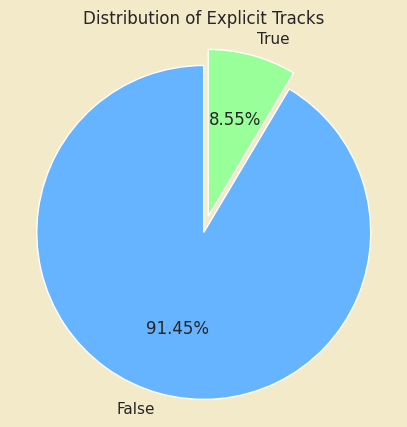

In [32]:
unique_values, value_counts = np.unique(categorical_cols['explicit'], return_counts=True)

fig, ax = plt.subplots(figsize=(5, 5))

# Explode the slice with explicit tracks for emphasis
explode = [0, 0.1]  # Only "yes" (true) will be slightly exploded
colors = ['#66b3ff','#99ff99']

ax.pie(value_counts, labels=unique_values, autopct='%1.2f%%', startangle=90, colors=colors, explode=explode)
ax.axis('equal')
ax.set_title('Distribution of Explicit Tracks')
plt.show()

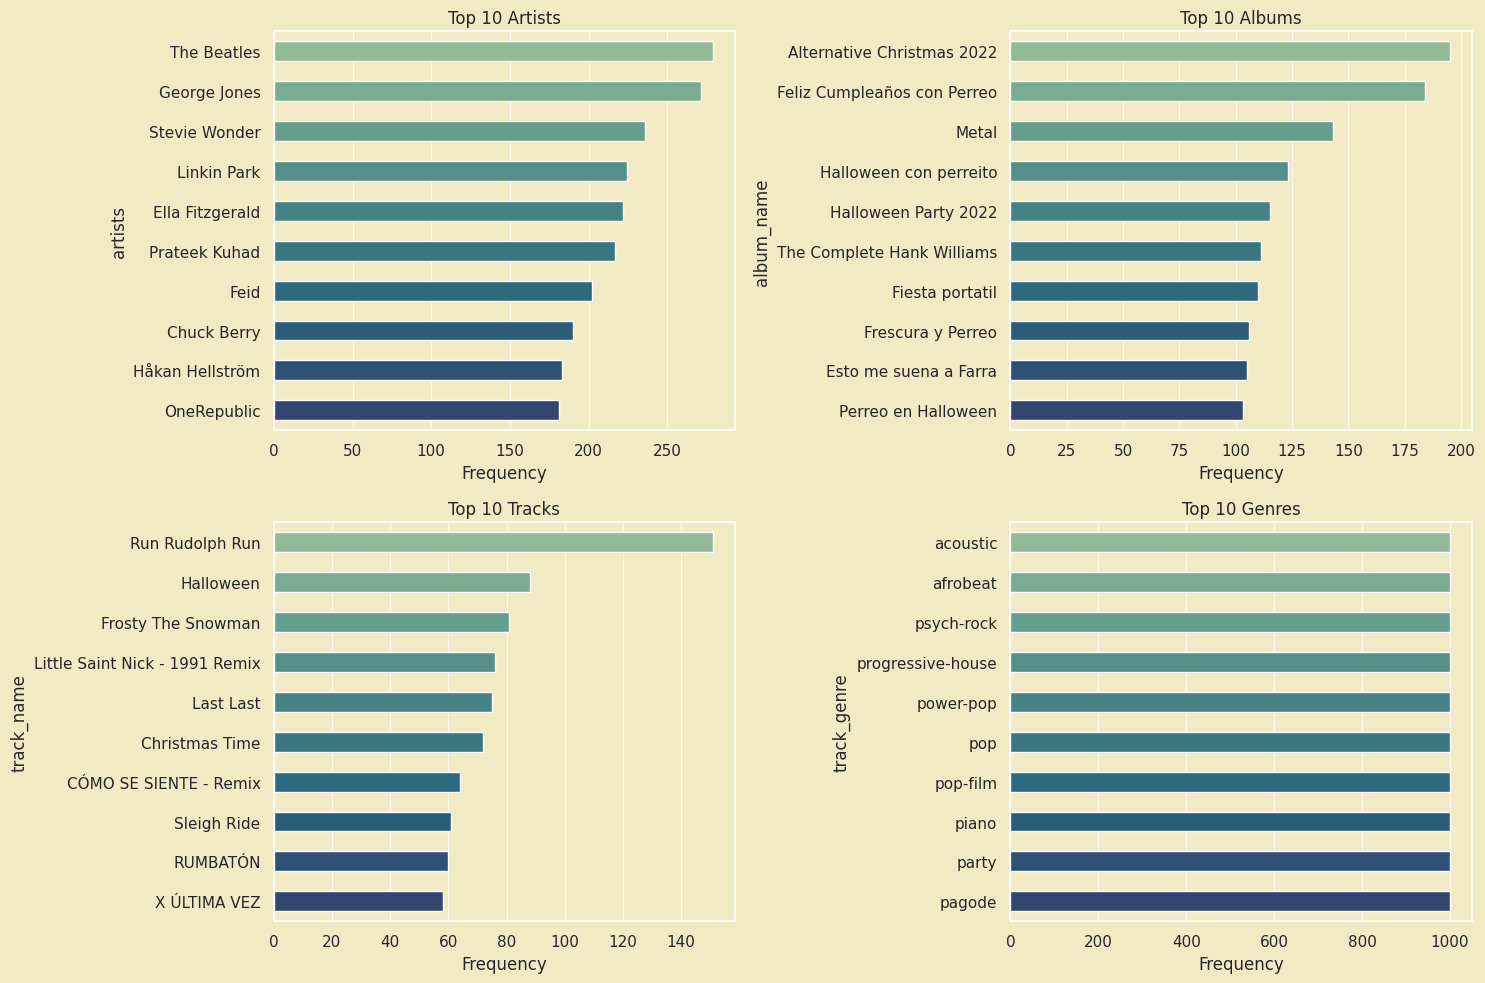

In [33]:
import warnings
top_n = 10
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
# Get the top N most frequent artists, albums, tracks, and genres
top_artists = df['artists'].value_counts().head(top_n)
top_albums = df['album_name'].value_counts().head(top_n)
top_tracks = df['track_name'].value_counts().head(top_n)
top_genres = df['track_genre'].value_counts().head(top_n)

# Disable FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Plotting
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

    # Top N Artists
    sns.barplot(x=top_artists.values, y=top_artists.index, palette="crest", ax=axes[0, 0], orient='h',  zorder=3, width=0.5)
    axes[0, 0].set_title(f'Top {top_n} Artists')
    axes[0, 0].set_xlabel('Frequency')
    axes[0, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Albums
    sns.barplot(x=top_albums.values, y=top_albums.index, palette="crest", ax=axes[0, 1], orient='h', zorder=3, width=0.5)
    axes[0, 1].set_title(f'Top {top_n} Albums')
    axes[0, 1].set_xlabel('Frequency')
    axes[0, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Tracks
    sns.barplot(x=top_tracks.values, y=top_tracks.index, palette="crest", ax=axes[1, 0], orient='h', zorder=3, width=0.5)
    axes[1, 0].set_title(f'Top {top_n} Tracks')
    axes[1, 0].set_xlabel('Frequency')
    axes[1, 0].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    # Top N Genres
    sns.barplot(x=top_genres.values, y=top_genres.index, palette="crest", ax=axes[1, 1], orient='h', zorder=3, width=0.5)
    axes[1, 1].set_title(f'Top {top_n} Genres')
    axes[1, 1].set_xlabel('Frequency')
    axes[1, 1].xaxis.grid(linestyle='-', linewidth=0.5, alpha=1, zorder=0)

    plt.tight_layout()
    plt.show()

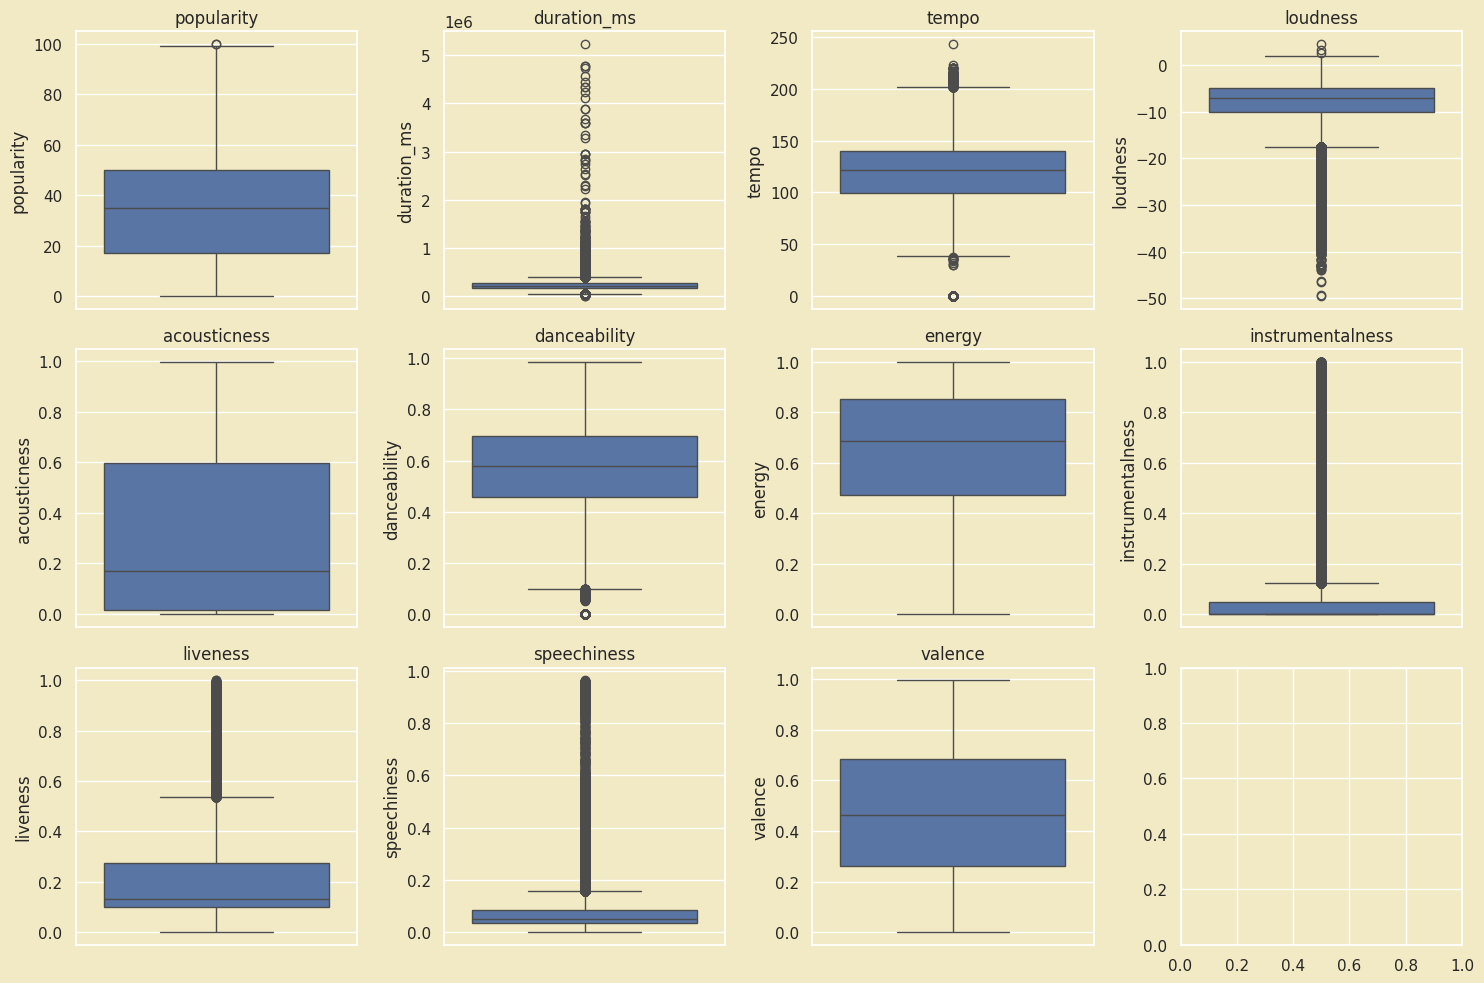

In [34]:
# boxplot for numerical columns
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
columns = ['popularity', 'duration_ms', 'tempo', 'loudness', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, col in enumerate(columns):
    sns.boxplot(y=col, data=numerical_cols, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

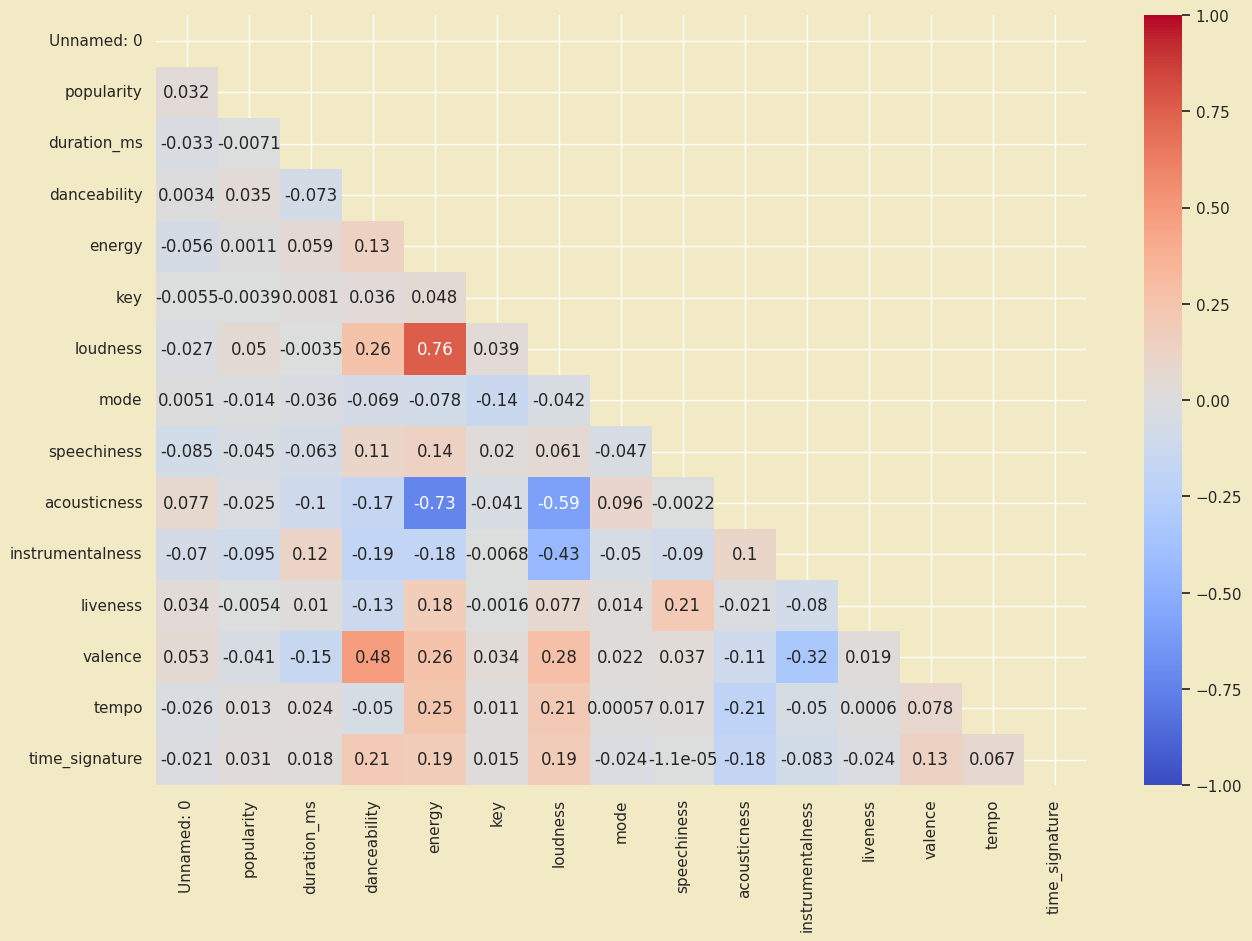

In [35]:
# heatmap for correlation
corr = numerical_cols.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.set_style('white')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
plt.figure(figsize=(15, 10))
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1,cmap='coolwarm')
plt.show()

In [36]:
####

unique_genres = df['track_genre'].unique()
print(len(unique_genres))

114


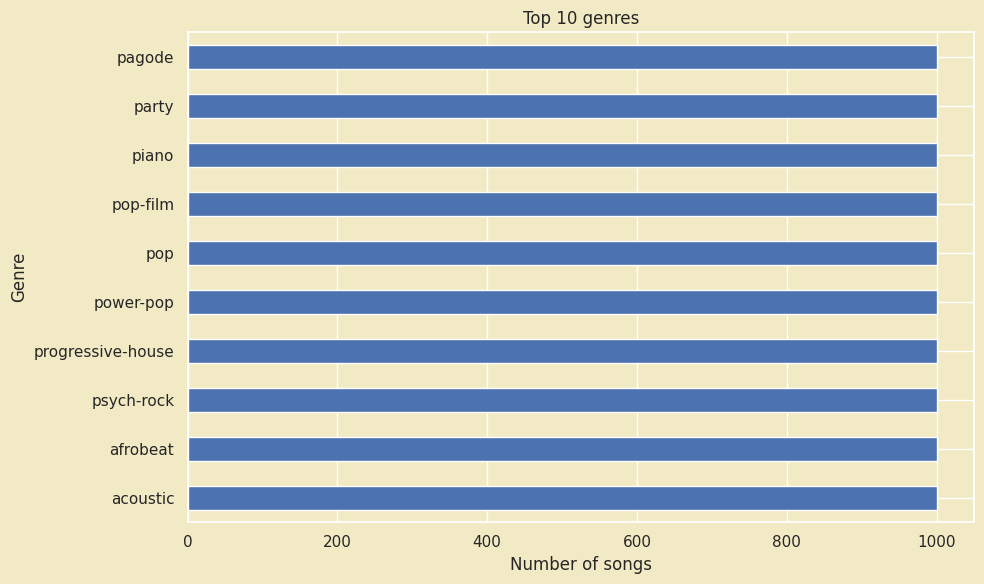

In [37]:
genre_counts = df['track_genre'].value_counts()
top_10_genres = genre_counts.head(10)

plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='barh')
plt.title('Top 10 genres')
plt.xlabel('Number of songs')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

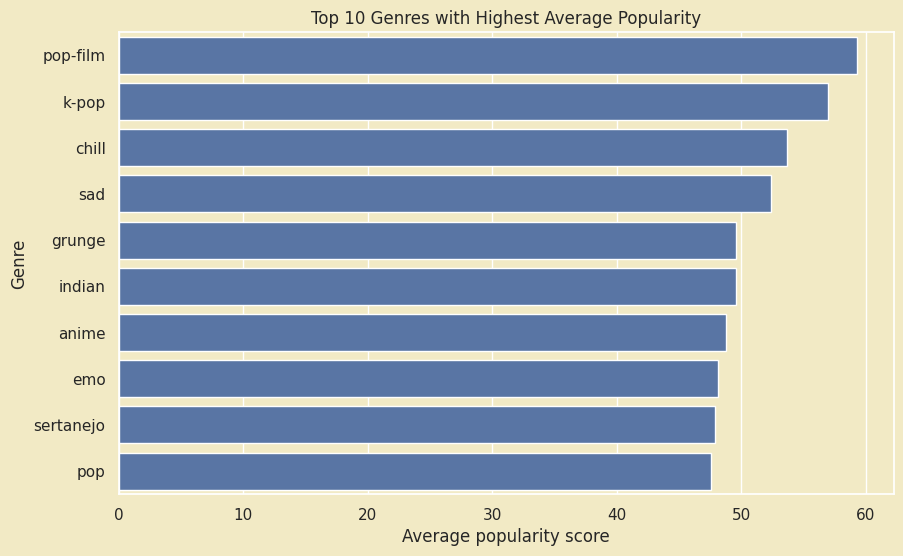

In [38]:
avg_popularity_by_genre = df.groupby('track_genre')['popularity'].mean().reset_index()
top10_popular_genres = avg_popularity_by_genre.nlargest(10, 'popularity')

plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='track_genre', data=top10_popular_genres)
plt.title('Top 10 Genres with Highest Average Popularity')
plt.xlabel('Average popularity score')
plt.ylabel('Genre')
plt.show()

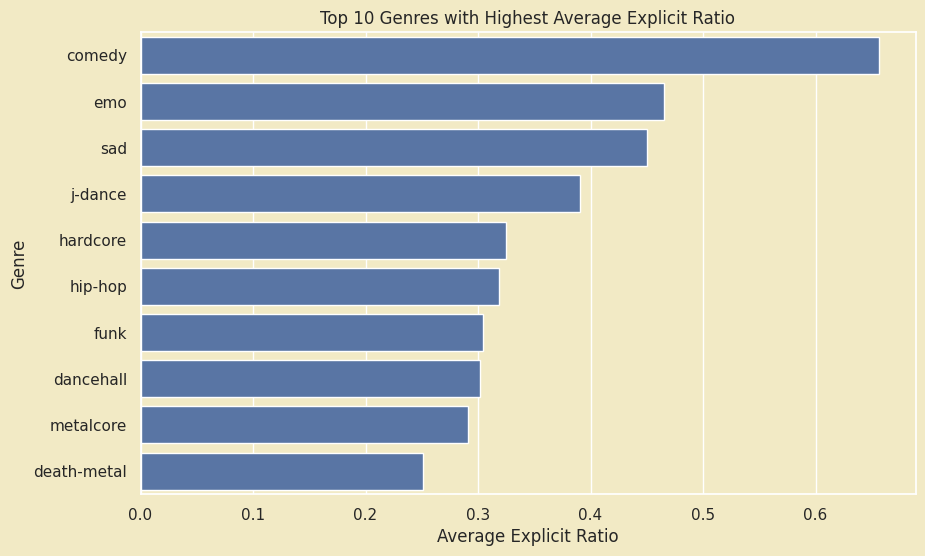

In [39]:
explicit_ratio_by_genre = df.groupby('track_genre')['explicit'].mean().reset_index()
top5_explicit_genres = explicit_ratio_by_genre.nlargest(10, 'explicit')

plt.figure(figsize=(10, 6))
sns.barplot(x='explicit', y='track_genre', data=top5_explicit_genres)
plt.title('Top 10 Genres with Highest Average Explicit Ratio')
plt.xlabel('Average Explicit Ratio')
plt.ylabel('Genre')
plt.show()

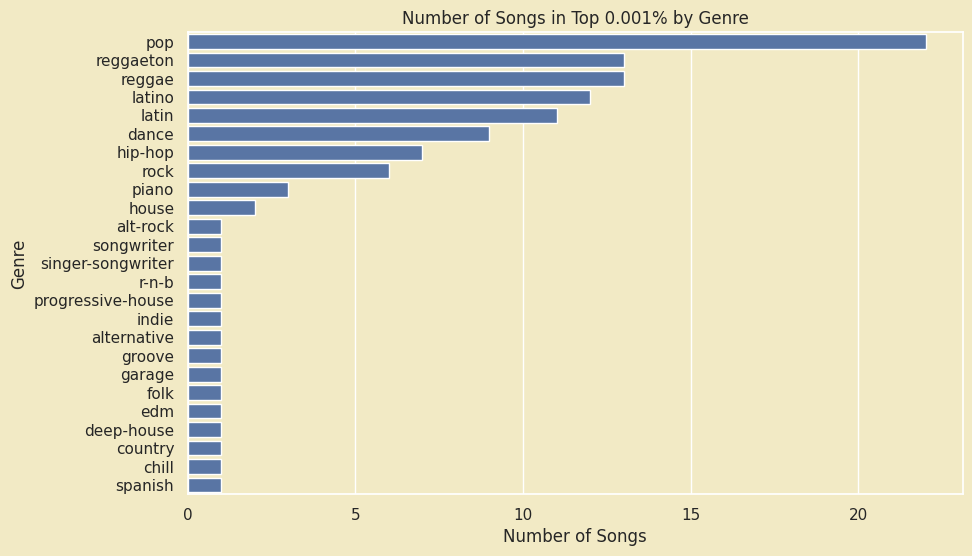

The genre with the most songs in the top 0.001% is pop with 22 songs.


In [40]:
df_sorted = df.sort_values(by='popularity', ascending=False)

top_10_percent = df_sorted.head(int(0.001 * len(df_sorted)))

top_genres_count = top_10_percent.groupby('track_genre').size().reset_index(name='count')
top_genres_count = top_genres_count.sort_values(by='count', ascending=False)

most_common_genre = top_genres_count.loc[top_genres_count['count'].idxmax()]

# Bước 5: Visualize Kết Quả
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='track_genre', data=top_genres_count)
plt.title('Number of Songs in Top 0.001% by Genre')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

print(f"The genre with the most songs in the top 0.001% is {most_common_genre['track_genre']} with {most_common_genre['count']} songs.")


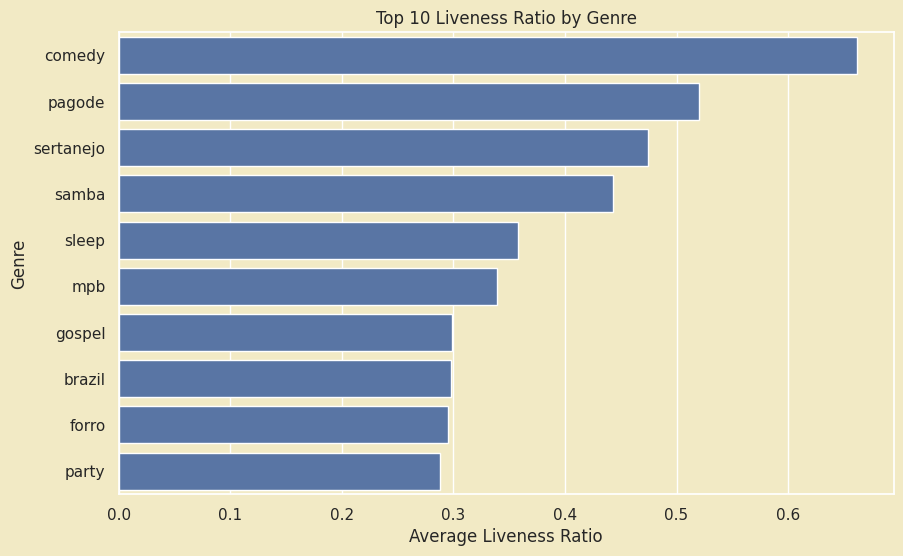

The genre with the highest liveness ratio is comedy with an average liveness ratio of 66.17%.


In [41]:
live_ratio_by_genre = df.groupby('track_genre')['liveness'].mean().reset_index()

top10_live_genres = live_ratio_by_genre.nlargest(10, 'liveness')
most_live_genre = live_ratio_by_genre.loc[live_ratio_by_genre['liveness'].idxmax()]

plt.figure(figsize=(10, 6))
sns.barplot(x='liveness', y='track_genre', data=top10_live_genres)
plt.title('Top 10 Liveness Ratio by Genre')
plt.xlabel('Average Liveness Ratio')
plt.ylabel('Genre')
plt.show()
print(f"The genre with the highest liveness ratio is {most_live_genre['track_genre']} with an average liveness ratio of {most_live_genre['liveness']:.2%}.")

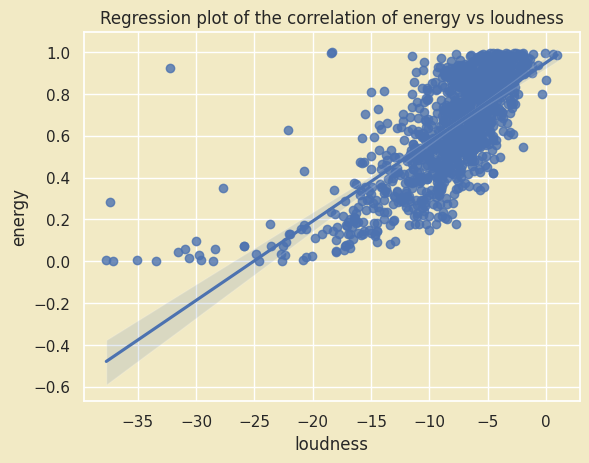

In [42]:
sample = df.sample(int(0.01 * len(df)))
sns.regplot(data=sample, y="energy", x="loudness", color="b")
plt.title("Regression plot of the correlation of energy vs loudness")
plt.show()

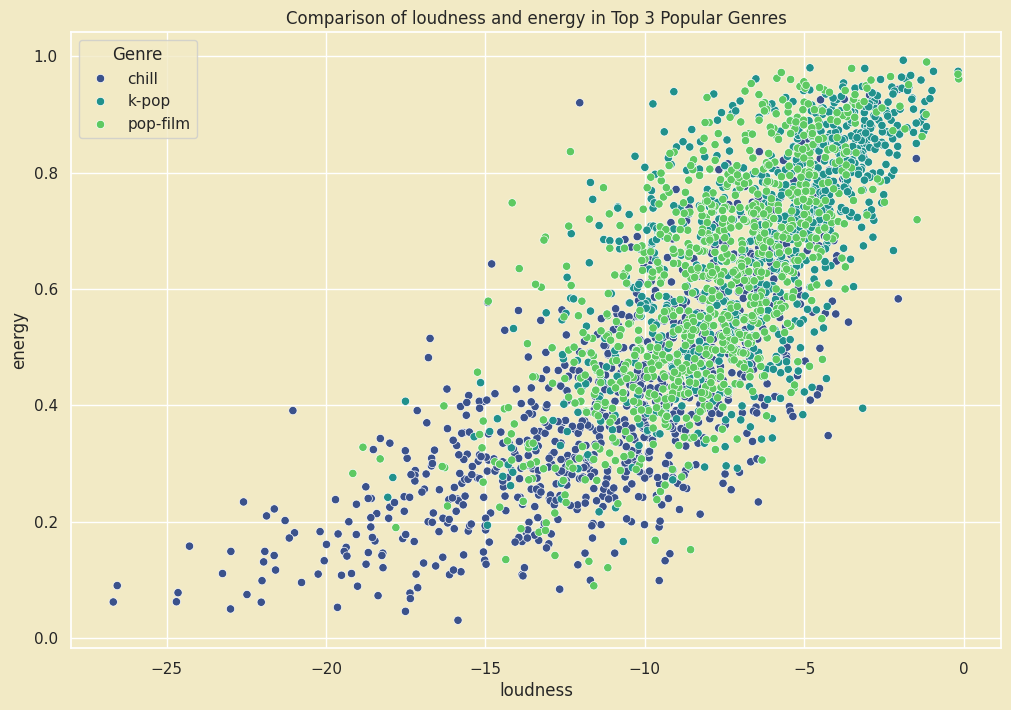

In [43]:
avg_popularity_by_genre = df.groupby('track_genre')['popularity'].mean().reset_index()

top3_popular_genres = avg_popularity_by_genre.nlargest(3, 'popularity')

top3_genre_data = df[df['track_genre'].isin(top3_popular_genres['track_genre'])]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='loudness', y='energy', hue='track_genre', data=top3_genre_data, palette='viridis')
plt.title('Comparison of loudness and energy in Top 3 Popular Genres')
plt.xlabel('loudness')
plt.ylabel('energy')
plt.legend(title='Genre')
plt.show()

In [44]:
top_genres = df.groupby('track_genre')['popularity'].mean()
top_genres = top_genres[top_genres >= 35].sort_values(ascending=False)
top_genres[:10]

,popularity
track_genre,
pop-film,59.283000
k-pop,56.952953
chill,53.651000
sad,52.379000
grunge,49.594000
indian,49.539000
anime,48.772000
emo,48.128000
sertanejo,47.866000


In [45]:
copy_df = df.copy()
copy_df['artists'] = copy_df['artists'].str.split(';')
copy_df = copy_df.explode('artists')

In [46]:
top_artists = copy_df.groupby('artists')['popularity'].mean()
top_artists = top_artists[top_artists >= 70].sort_values(ascending=False)
top_artists[:10]

,popularity
artists,
Bizarrap,99.0
Quevedo,99.0
Harry Styles,92.0
Luar La L,90.5
Beach Weather,90.0
Pablo Pesadilla,88.0
Polimá Westcoast,88.0
Olivia Rodrigo,87.4
Lewis Capaldi,87.0


In [47]:
top_artists = top_artists.index.tolist()
genres_artists = df[df['artists'].isin(top_artists)]['track_genre'].unique().tolist()
genres_artists[:10]

['alt-rock',
 'alternative',
 'blues',
 'british',
 'cantopop',
 'chill',
 'country',
 'dance',
 'disco',
 'edm']

In [48]:
!pip install matplotlib_venn

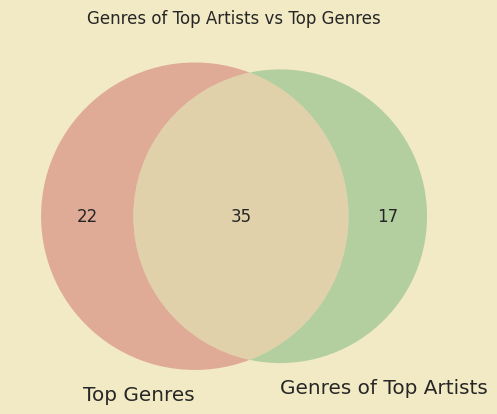

In [49]:
from matplotlib_venn import venn2
top_genres = top_genres.index.tolist()
venn2([set(top_genres), set(genres_artists)], set_labels=('Top Genres', 'Genres of Top Artists'))
plt.title('Genres of Top Artists vs Top Genres')
plt.show()

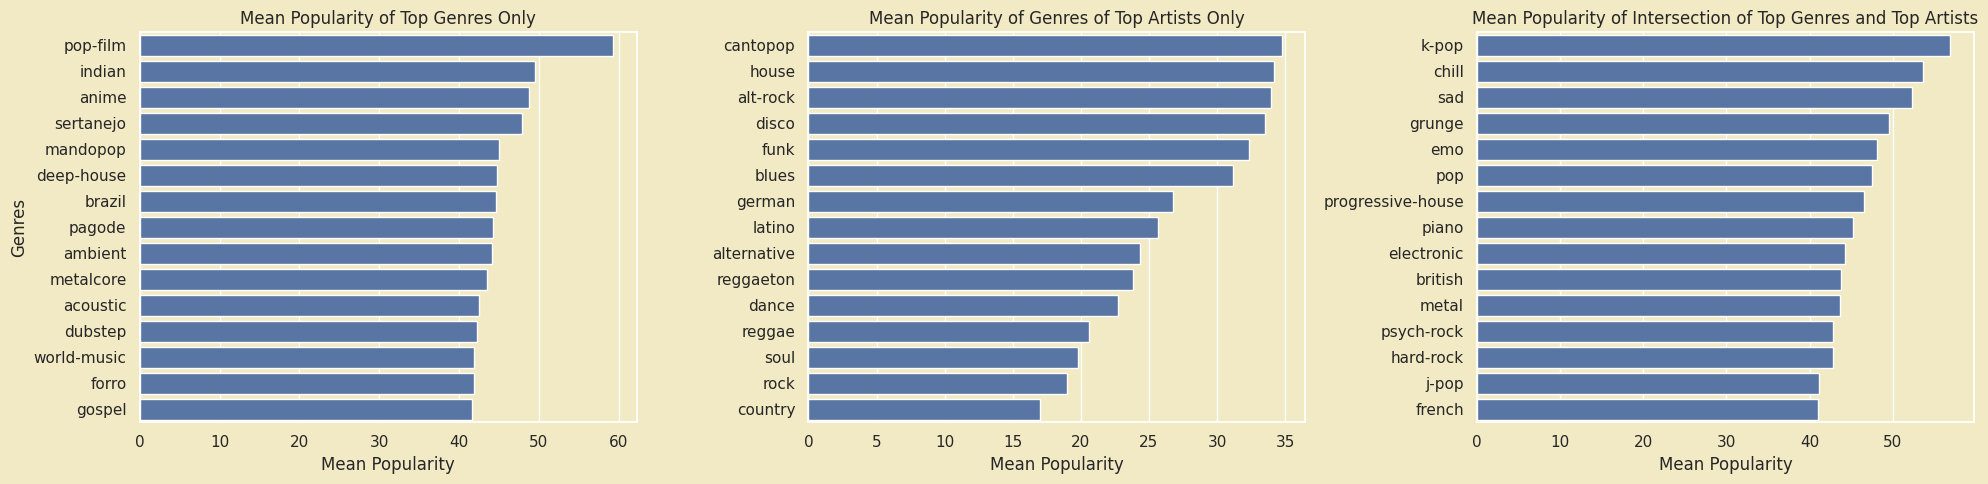

In [50]:
top_genres_only = list(set(top_genres) - set(genres_artists))
genres_artists_only = list(set(genres_artists) - set(top_genres))
intersection = list(set(top_genres) & set(genres_artists))

top_genres_only = df[df['track_genre'].isin(top_genres_only)].groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)
genres_artists_only = df[df['track_genre'].isin(genres_artists_only)].groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)
intersection = df[df['track_genre'].isin(intersection)].groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(x=top_genres_only.values, y=top_genres_only.index, ax=axes[0])
axes[0].set_title('Mean Popularity of Top Genres Only')
axes[0].set_xlabel('Mean Popularity')
axes[0].set_ylabel('Genres')

sns.barplot(x=genres_artists_only.values, y=genres_artists_only.index, ax=axes[1])
axes[1].set_title('Mean Popularity of Genres of Top Artists Only')
axes[1].set_xlabel('Mean Popularity')
axes[1].set_ylabel('')

sns.barplot(x=intersection.values, y=intersection.index, ax=axes[2])
axes[2].set_title('Mean Popularity of Intersection of Top Genres and Top Artists')
axes[2].set_xlabel('Mean Popularity')
axes[2].set_ylabel('')


plt.tight_layout()
plt.show()

In [51]:
copy_df = df.copy()
copy_df['artists'] = copy_df['artists'].str.split(';')
copy_df = copy_df.explode('artists')

artist_genre_count = copy_df.groupby('artists')['track_genre'].nunique().sort_values(ascending=False)

top_artists = copy_df.groupby('artists')['popularity'].mean()
top_artists = top_artists[top_artists >= 60].sort_values(ascending=False)
top_artists = top_artists.index.tolist()

copy_df = copy_df[copy_df['artists'].isin(top_artists)]

top_artist_genre_count = copy_df.groupby('artists')['track_genre'].nunique().sort_values(ascending=False)

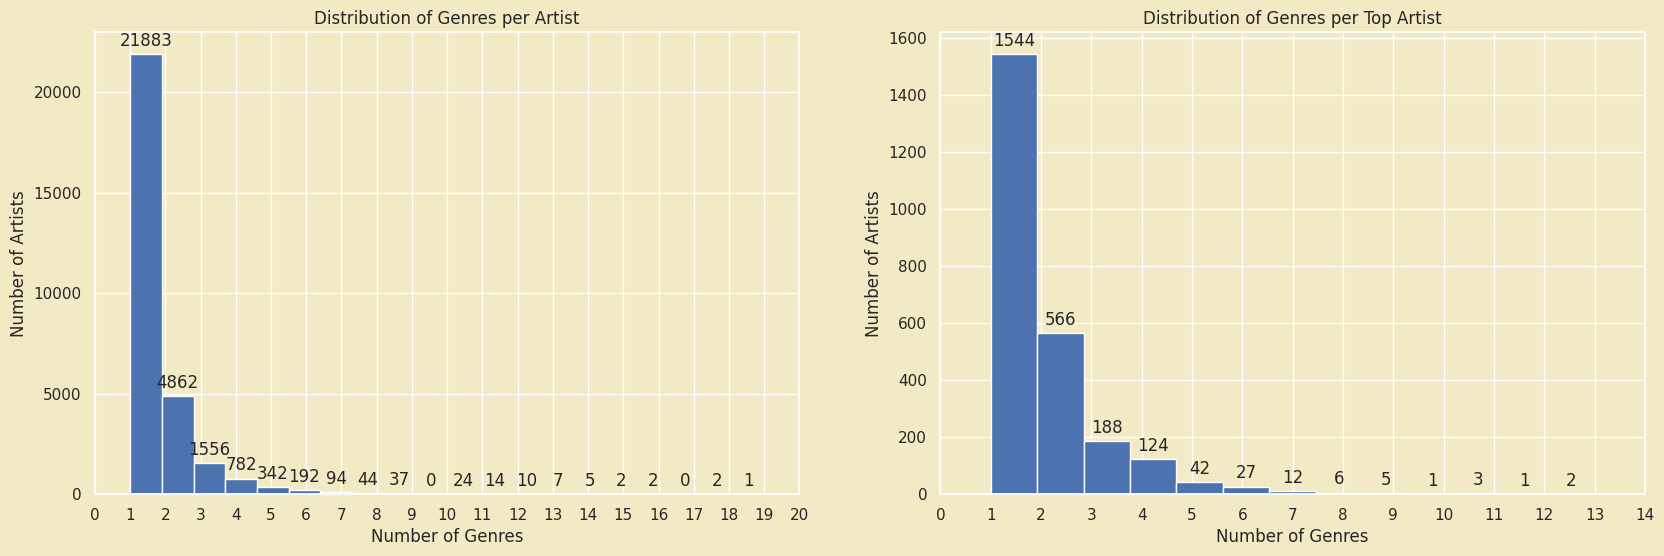

In [52]:
# Plot distribution of genres per artist and top artists
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.set_style('darkgrid')
axes[0].hist(artist_genre_count, bins=20)
axes[0].set_title('Distribution of Genres per Artist')
axes[0].set_xlabel('Number of Genres')
axes[0].set_ylabel('Number of Artists')
axes[0].bar_label(axes[0].containers[0], padding=3)
axes[0].set_xticks(np.arange(0, 21, 1))

axes[1].hist(top_artist_genre_count, bins=13)
axes[1].set_title('Distribution of Genres per Top Artist')
axes[1].set_xlabel('Number of Genres')
axes[1].set_ylabel('Number of Artists')
axes[1].bar_label(axes[1].containers[0], padding=3)
axes[1].set_xticks(np.arange(0, 15, 1))

plt.show()

In [53]:
artist_more_than_4_genres = artist_genre_count[artist_genre_count >= 4].index.tolist()
df_more_than_4_genres = copy_df[copy_df['artists'].isin(artist_more_than_4_genres)]

diverse_artists = df_more_than_4_genres.groupby('artists')['popularity'].mean()

artist_less_than_4_genres = artist_genre_count[artist_genre_count < 4].index.tolist()
df_less_than_4_genres = copy_df[copy_df['artists'].isin(artist_less_than_4_genres)]

less_diverse_artists = df_less_than_4_genres.groupby('artists')['popularity'].mean()

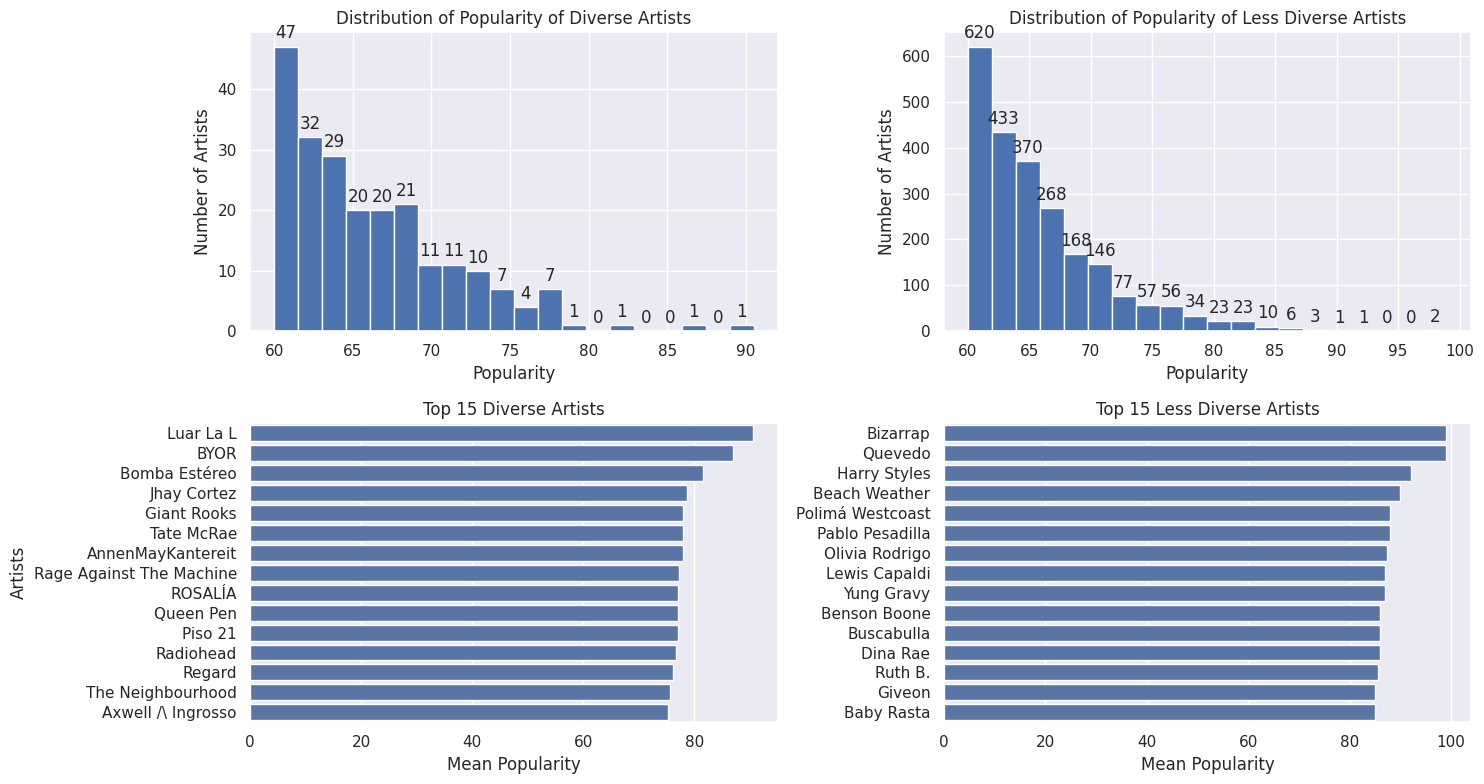

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
axes[0, 0].hist(diverse_artists, bins=20)
axes[0, 0].set_title('Distribution of Popularity of Diverse Artists')
axes[0, 0].set_xlabel('Popularity')
axes[0, 0].set_ylabel('Number of Artists')
axes[0, 0].bar_label(axes[0, 0].containers[0], padding=3)

axes[0, 1].hist(less_diverse_artists, bins=20)
axes[0, 1].set_title('Distribution of Popularity of Less Diverse Artists')
axes[0, 1].set_xlabel('Popularity')
axes[0, 1].set_ylabel('Number of Artists')
axes[0, 1].bar_label(axes[0, 1].containers[0], padding=3)

sns.barplot(x=diverse_artists.sort_values(ascending=False).head(15).values, y=diverse_artists.sort_values(ascending=False).head(15).index, ax=axes[1, 0])
axes[1, 0].set_title('Top 15 Diverse Artists')
axes[1, 0].set_xlabel('Mean Popularity')
axes[1, 0].set_ylabel('Artists')

sns.barplot(x=less_diverse_artists.sort_values(ascending=False).head(15).values, y=less_diverse_artists.sort_values(ascending=False).head(15).index, ax=axes[1, 1])
axes[1, 1].set_title('Top 15 Less Diverse Artists')
axes[1, 1].set_xlabel('Mean Popularity')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

In [55]:
####recommnedation

df = df.drop(['time_signature', 'key'], axis=1)
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic


In [50]:
df.drop_duplicates(subset=['track_id'], inplace=True)
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic


In [52]:
#Normalize the data
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

numerical_cols = df.select_dtypes(include=np.number).columns
data_norm = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols, index=df['track_id'])

In [60]:
# listTrackNameListened = ['Heavy Heart', 'Somebody Else - Acoustic', 'Always Be My Baby']
from scipy.spatial import distance

trackNameListened = "Knockin' On Heaven's Door"
track_id = df[(df['track_name'] == trackNameListened)][['track_id']]
track_id = track_id.values[0][0]

target_track = list(data_norm.loc[track_id])

In [61]:
data_result = pd.DataFrame()
data_result['euclidean'] = [distance.euclidean(obj, target_track) for index, obj in data_norm.iterrows()]
data_result['track_id'] = data_norm.index

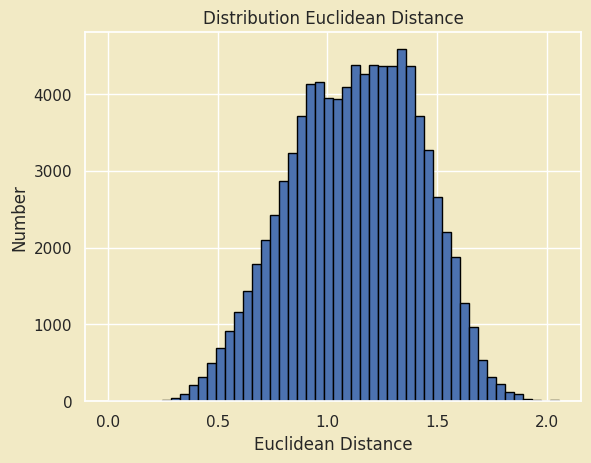

In [62]:
plt.hist(data_result['euclidean'], bins=50, edgecolor='black')

plt.xlabel('Euclidean Distance')
plt.ylabel('Number')

plt.title('Distribution Euclidean Distance')

plt.show()

In [63]:
data_rec = data_result.sort_values(by=['euclidean']).iloc[:6]

In [64]:
data_init = df.set_index(df.loc[:, 'track_id'])
track_list = pd.DataFrame()
for i in list(data_rec.loc[:, 'track_id']):
    if i in list(df.loc[:, 'track_id']):
        track_info = data_init.loc[[i], ['track_name', 'artists']]
        track_list = pd.concat([track_list, track_info], ignore_index=True)

In [65]:
recomended = track_list.values.tolist()
print(f"""You've just listened:  \n \t - {recomended[0][0]} - {recomended[0][1]}
Now you may listen :
\n \t - '{recomended[1][0]} - {recomended[1][1]}'
Or any of:
\n \t - '{recomended[2][0]} - {recomended[2][1]}'
\n \t - '{recomended[3][0]} - {recomended[3][1]}'
\n \t - '{recomended[4][0]} - {recomended[4][1]}'
\n \t - '{recomended[5][0]} - {recomended[5][1]}'  """)

You've just listened:  
 	 - Knockin' On Heaven's Door - Bob Dylan 
Now you may listen : 

 	 - '17 - Pink Sweat$'
Or any of:

 	 - 'Amazed - Lonestar' 

 	 - 'A Thousand Years - Christina Perri'

 	 - 'Say You, Say Me - Lionel Richie'

 	 - 'How Do I Live - LeAnn Rimes'  


In [4]:
df = pd.read_csv("/content/sample_data/dataset.csv")

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset (Replace with your dataset file)
df = pd.read_csv("/content/sample_data/dataset.csv")


df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset (Replace with your dataset file)
df = pd.read_csv("/content/sample_data/dataset.csv")

# Select relevant numeric audio features for similarity comparison
audio_features = [
       'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'
       ]

# Drop missing values (if any)
df = df.dropna(subset=audio_features)
df.columns




Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[audio_features])

# Convert scaled data into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=audio_features)
df_scaled["track_name"] = df["track_name"].values
df_scaled["artists"] = df["artists"].values



In [6]:
from sklearn.neighbors import NearestNeighbors

# Fit Nearest Neighbors with feature names retained
nn_model = NearestNeighbors(n_neighbors=10, metric="cosine")
nn_model.fit(df_scaled[audio_features])  # Ensure it fits on a DataFrame

def recommend_songs_nn(song_name, top_n=5):
    """Finds similar songs using Nearest Neighbors with correct feature names."""

    if song_name not in df_scaled["track_name"].values:
        return "❌ Song not found in dataset!"

    # Get song index
    song_index = df_scaled[df_scaled["track_name"] == song_name].index[0]

    # Extract the correct feature row as a DataFrame (not a NumPy array)
    query_song = df_scaled[audio_features].iloc[[song_index]]  # Double brackets keep feature names!

    # Find nearest neighbors (excluding itself)
    distances, indices = nn_model.kneighbors(query_song, n_neighbors=top_n+1)

    # Get recommended songs
    recommended_songs = df_scaled.iloc[indices[0][1:]][["track_name", "artists"]]

    return recommended_songs

# Example Usage
print(recommend_songs_nn("Blinding Lights"))


                       track_name         artists
34683                         1+1    Ready Kirken
100474                    Disfraz   Los Caligaris
62803                     One Day      Omoinotake
90428           Rock de la Cárcel   Palito Ortega
66289   Casper The Friendly Ghost  The Party Cats
